# Red wine qulatiy prediction:

Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).


This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 
7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration:

Use machine learning to determine which physiochemical properties make a wine 'good'!

Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/winequality-red.csv


In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Creating a DataFrame and loading the dataset into it
df = pd.read_csv('Red_wine_quality_prediction.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# Checking the cull values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

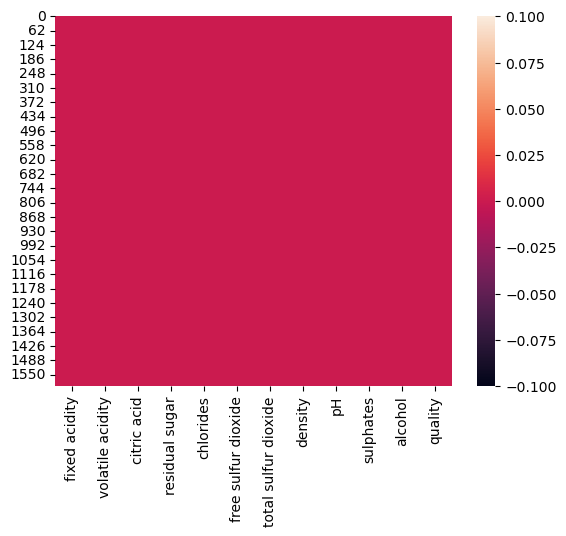

In [8]:
# checking the null vallues by plotting the heatmap
sns.heatmap(df.isnull())

In [9]:
# lets check the unique values present in the dataset for verifying whether there is any blank space are present or not
for i in df.columns:
    print(df[i].unique())

[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.975 0.26  0.87  0.18
 0.27  

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [11]:
# checking the skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<Axes: ylabel='Frequency'>

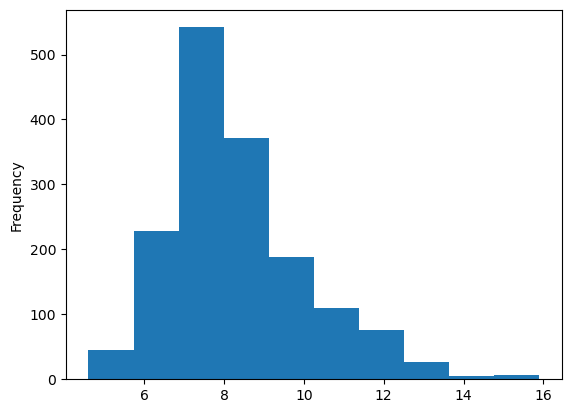

In [12]:
# Ckecking skewness of all the columns which posses skewness by plotting the histogram
df['fixed acidity'].plot.hist()

<Axes: ylabel='Frequency'>

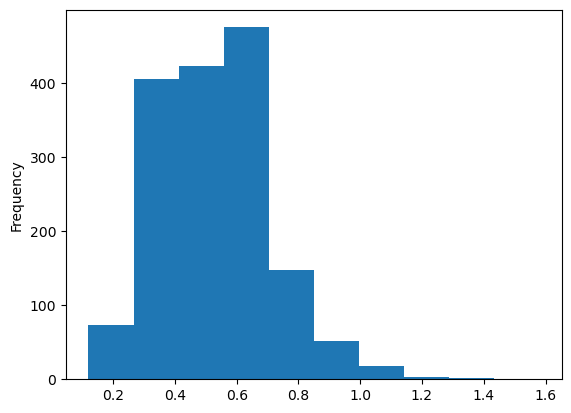

In [13]:
df['volatile acidity'].plot.hist()

<Axes: ylabel='Frequency'>

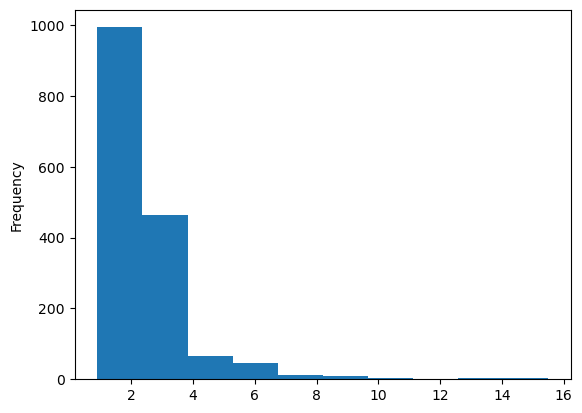

In [14]:
df['residual sugar'].plot.hist()

<Axes: ylabel='Frequency'>

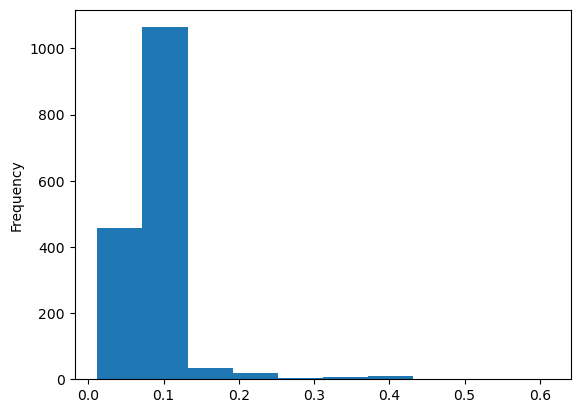

In [15]:
df['chlorides'].plot.hist()

<Axes: ylabel='Frequency'>

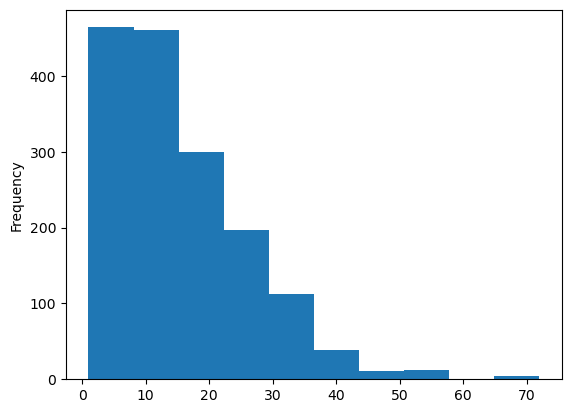

In [16]:
df['free sulfur dioxide'].plot.hist()

<Axes: ylabel='Frequency'>

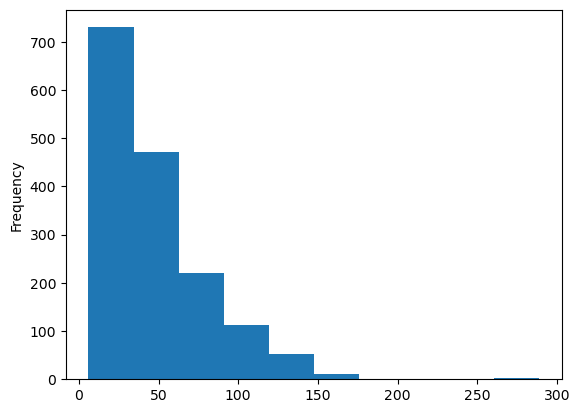

In [17]:
df['total sulfur dioxide'].plot.hist()

<Axes: ylabel='Frequency'>

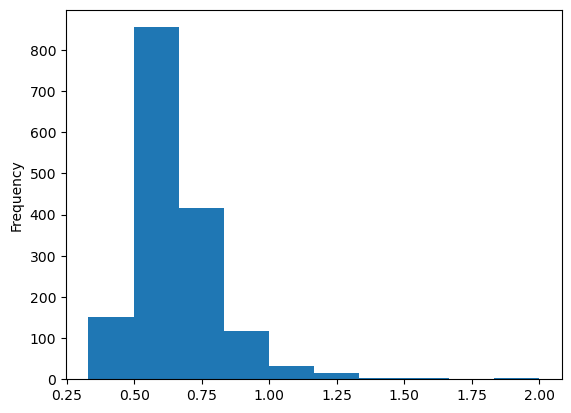

In [18]:
df['sulphates'].plot.hist()

<Axes: ylabel='Frequency'>

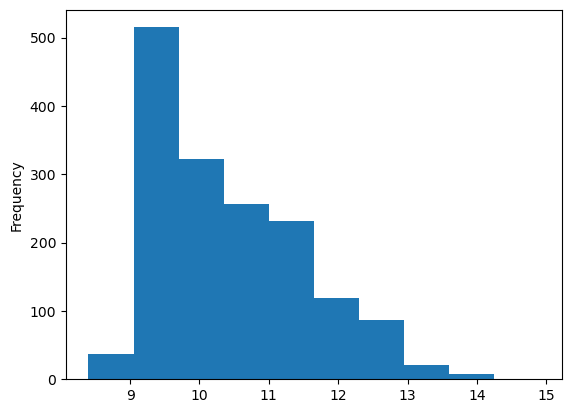

In [19]:
df['alcohol'].plot.hist()

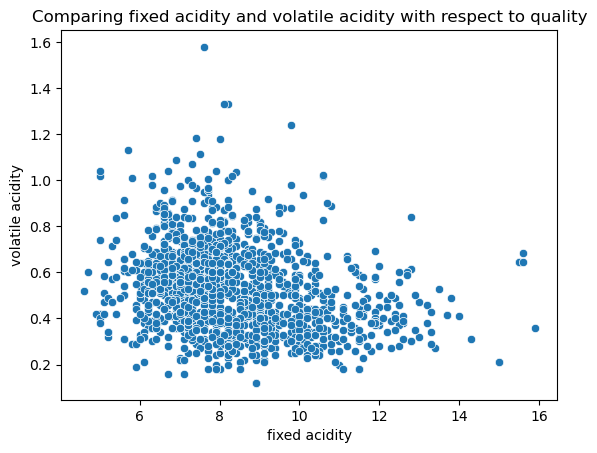

In [20]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'fixed acidity', y ='volatile acidity', data = df)    
plt.show()

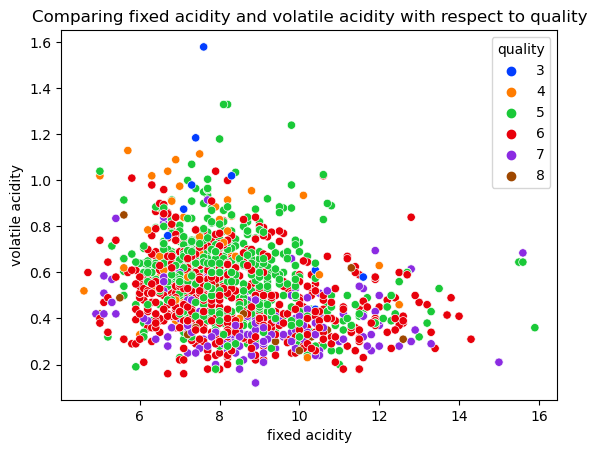

In [21]:
# Comparing the fixed acidity and volatile acidity with respect to quality
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'fixed acidity', y ='volatile acidity', data = df, hue = 'quality', palette = 'bright')     # here hue means difference between fixed acidity and volatile acidity with respect to quality
plt.show()

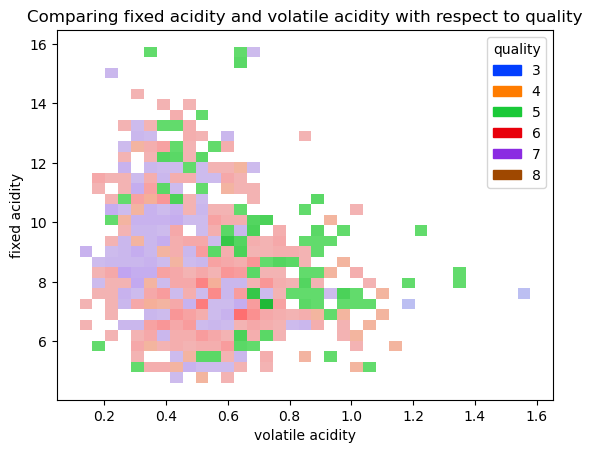

In [22]:
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.histplot(x = 'volatile acidity', y = 'fixed acidity', data = df, hue = 'quality', palette = 'bright')
plt.show()

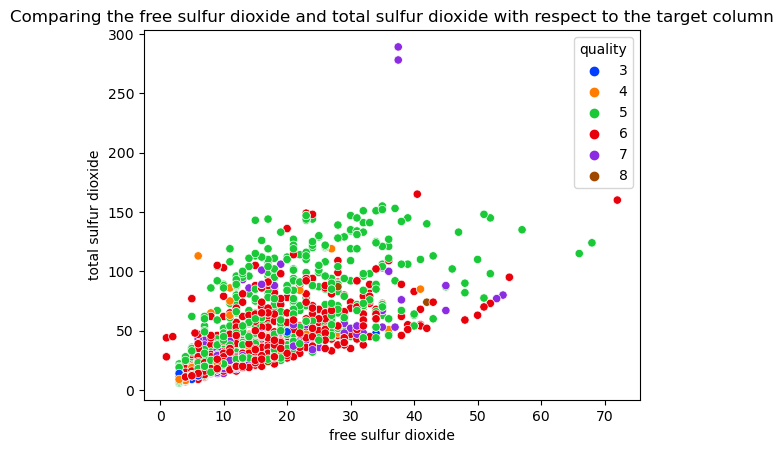

In [23]:
# Comparing the free sulfur dioxide and total sulfur dioxide with respect to the target column
plt.title('Comparing the free sulfur dioxide and total sulfur dioxide with respect to the target column')
sns.scatterplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', data = df, hue = 'quality', palette = 'bright')
plt.show()

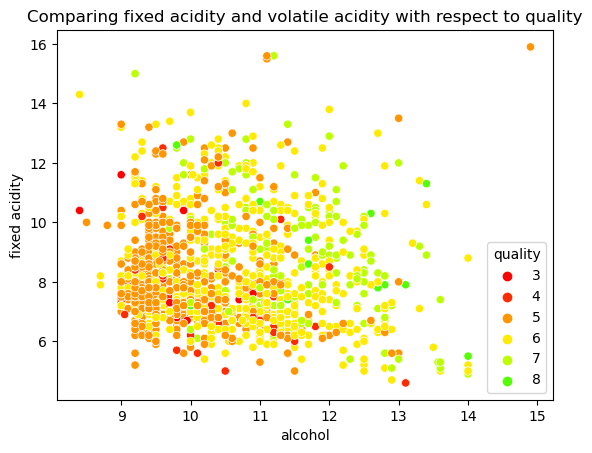

In [24]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'alcohol', y ='fixed acidity', hue ='quality', data = df, palette = 'prism')    
plt.show()

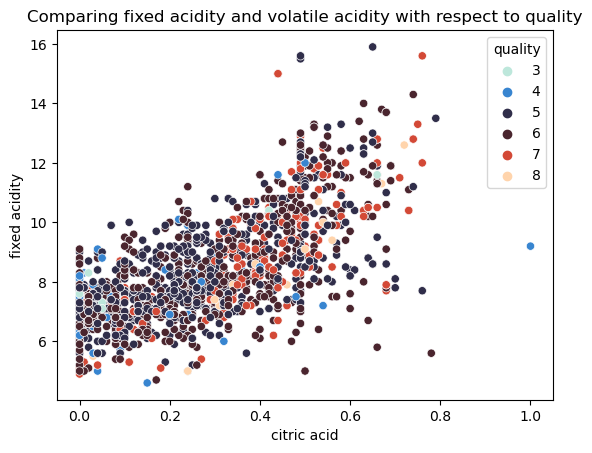

In [25]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'citric acid', y ='fixed acidity', hue ='quality', data = df, palette = 'icefire')    
plt.show()

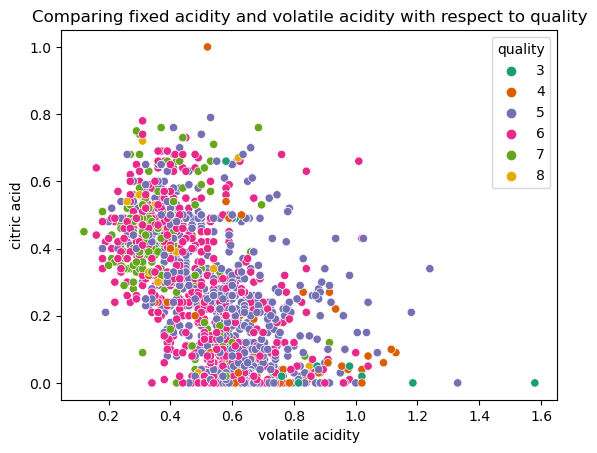

In [26]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'volatile acidity', y ='citric acid', hue ='quality', data = df, palette = 'Dark2')    
plt.show()

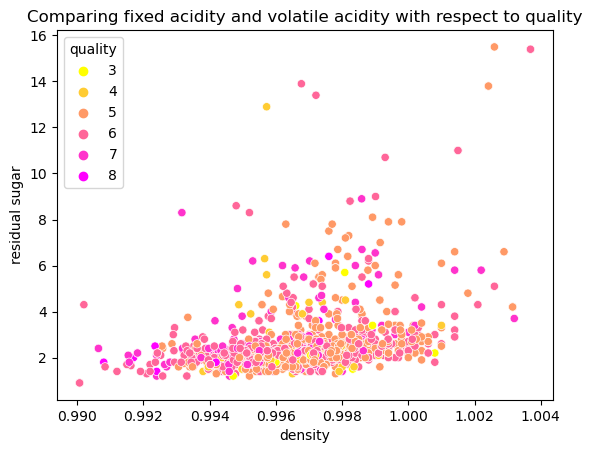

In [27]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'density', y ='residual sugar', hue ='quality', data = df, palette = 'spring_r')    
plt.show()

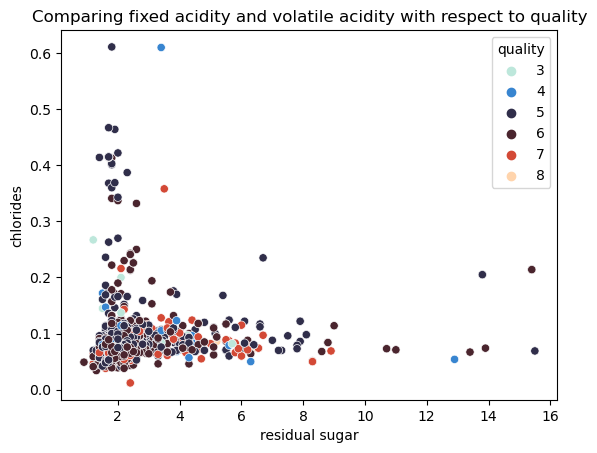

In [28]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'residual sugar', y ='chlorides', hue ='quality', data = df, palette = 'icefire')    
plt.show()

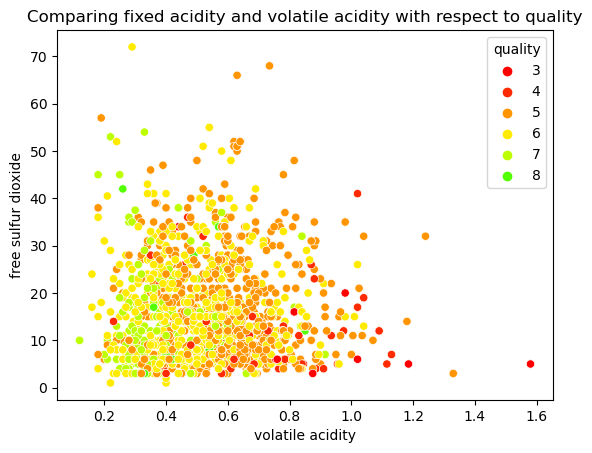

In [29]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'volatile acidity', y ='free sulfur dioxide', hue ='quality', data = df, palette = 'prism')    
plt.show()

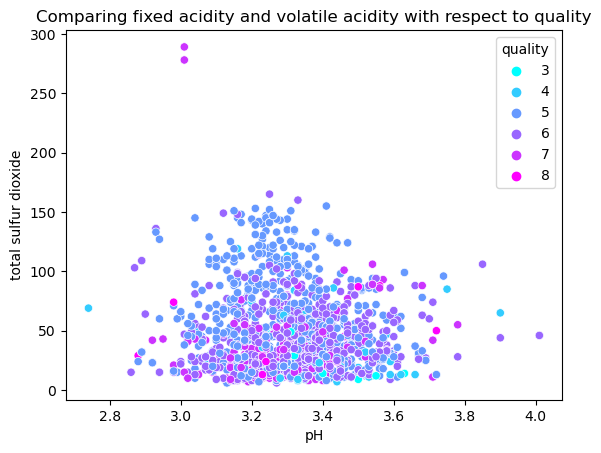

In [30]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'pH', y ='total sulfur dioxide',hue ='quality', data = df, palette = 'cool')    
plt.show()

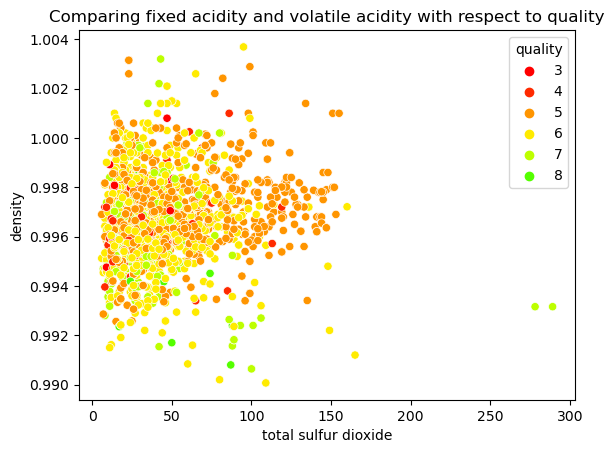

In [31]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'total sulfur dioxide', y ='density', hue ='quality', data = df, palette = 'prism')    
plt.show()

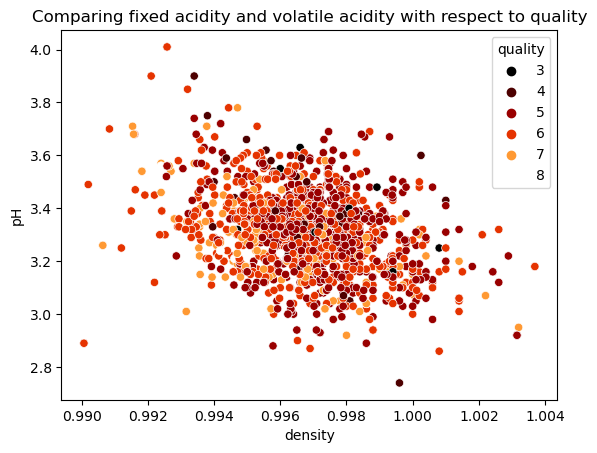

In [32]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'density', y ='pH', hue ='quality', data = df, palette = 'gist_heat')    
plt.show()

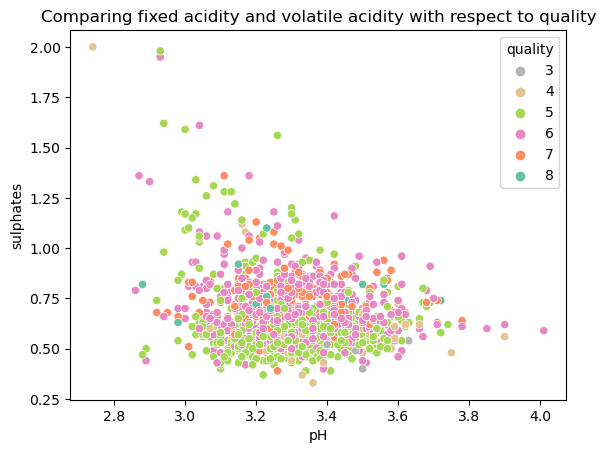

In [33]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'pH', y ='sulphates', hue ='quality', data = df, palette = 'Set2_r')    
plt.show()

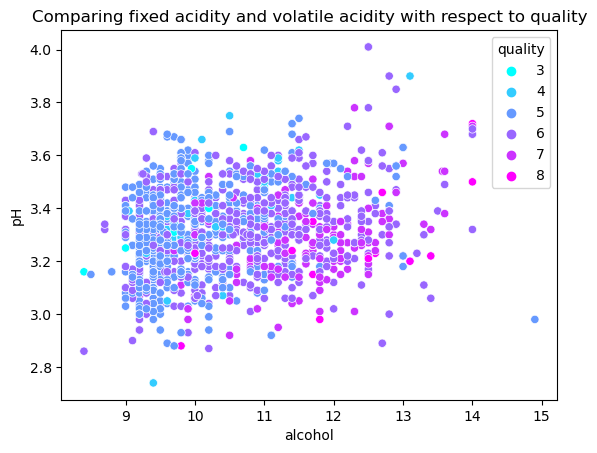

In [34]:
# Comparing the fixed acidity and volatile acidity 
plt.title('Comparing fixed acidity and volatile acidity with respect to quality')
sns.scatterplot(x = 'alcohol',y ='pH', hue ='quality', data = df, palette = 'cool')    
plt.show()

In [35]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

C:\Users\andyt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


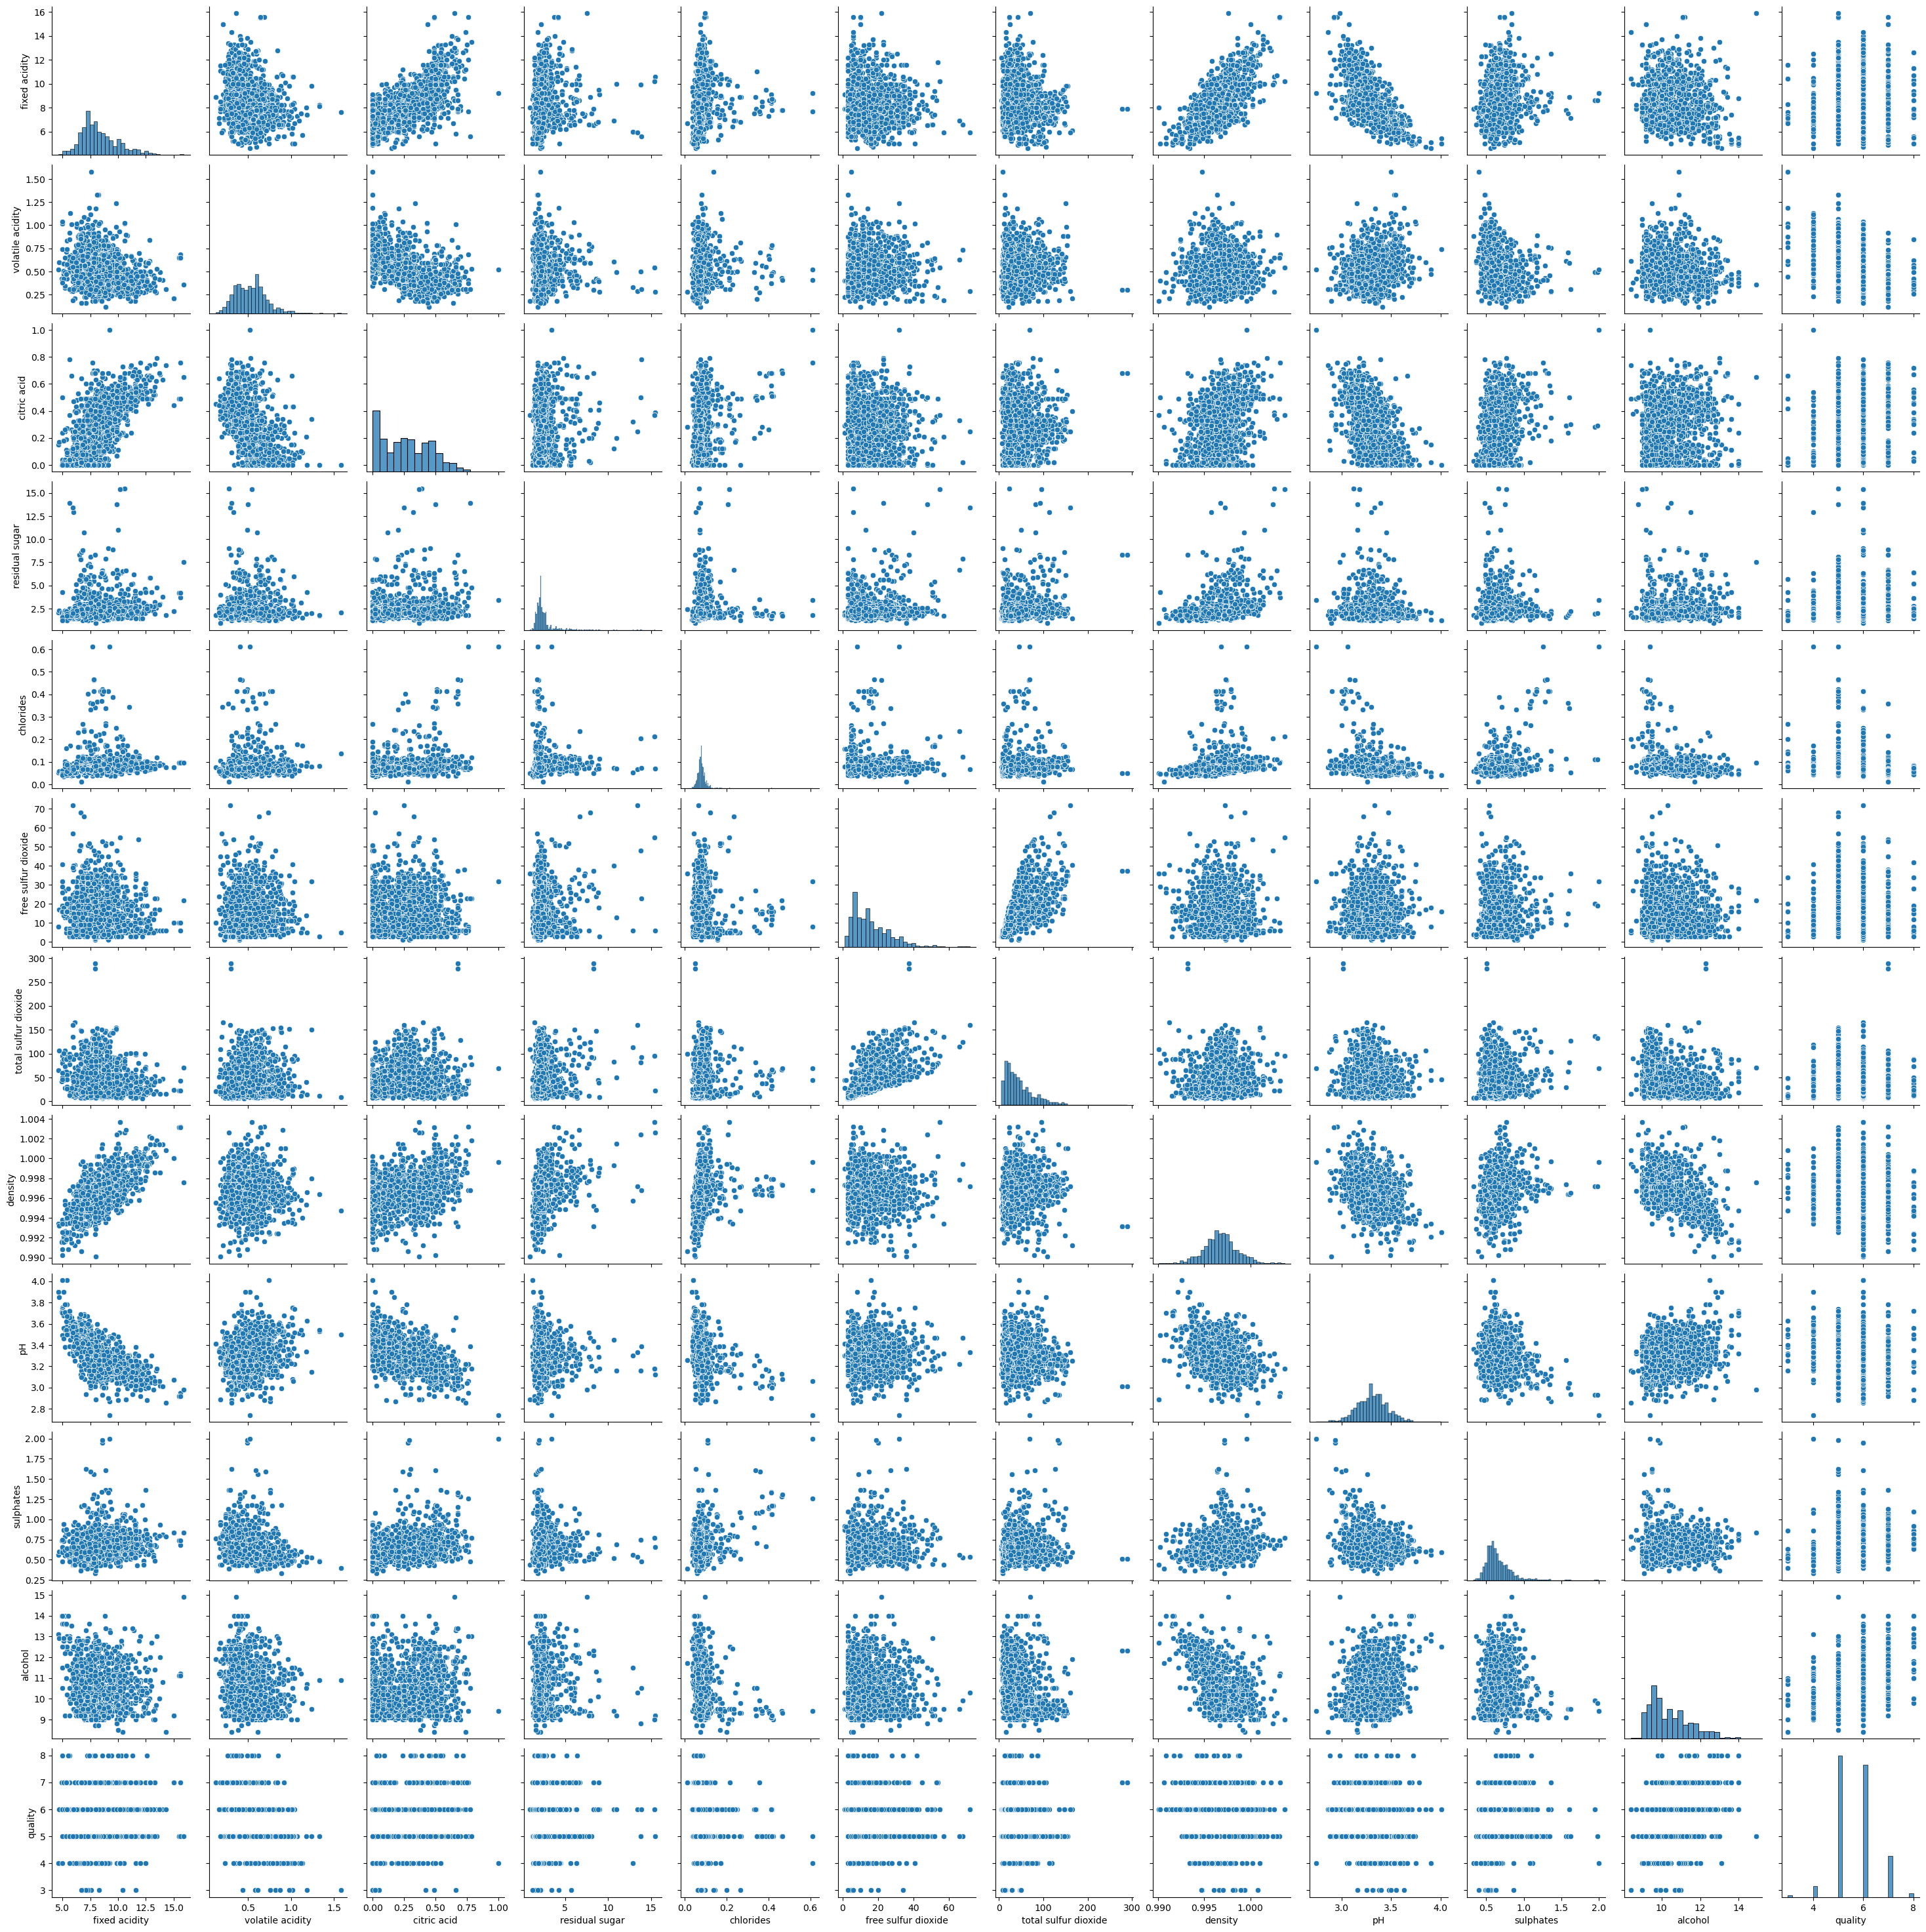

In [36]:
sns.pairplot(df)
plt.show()


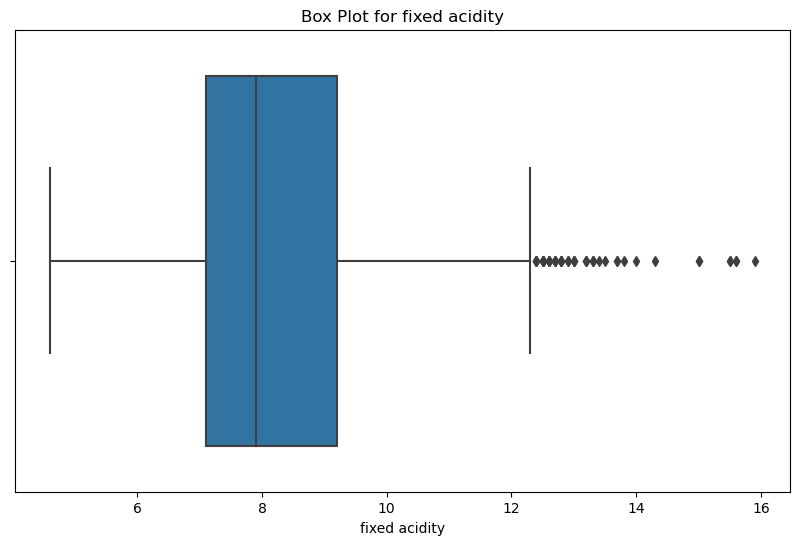

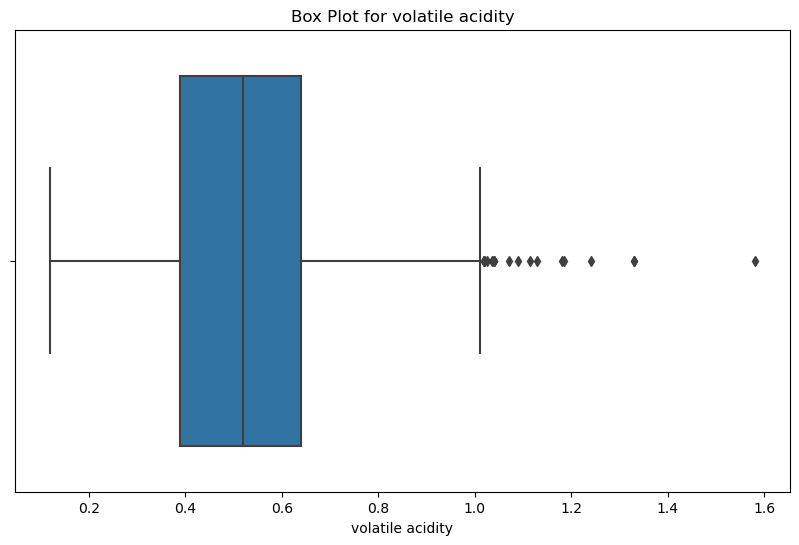

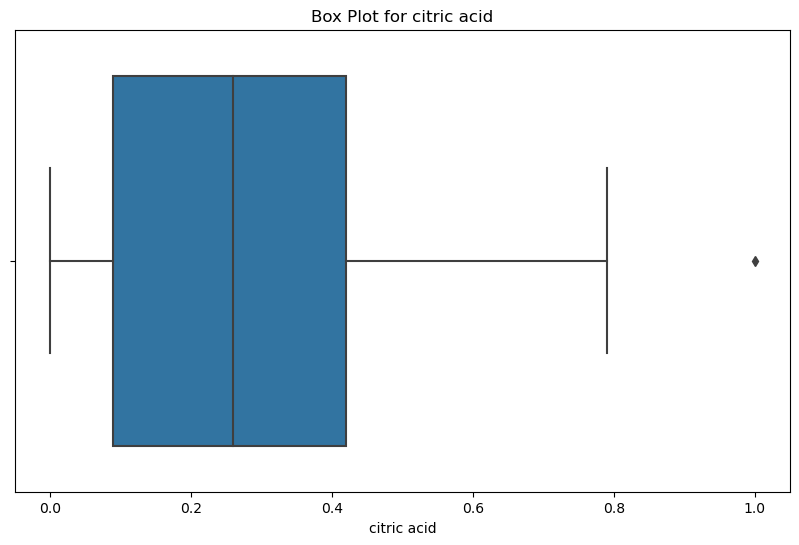

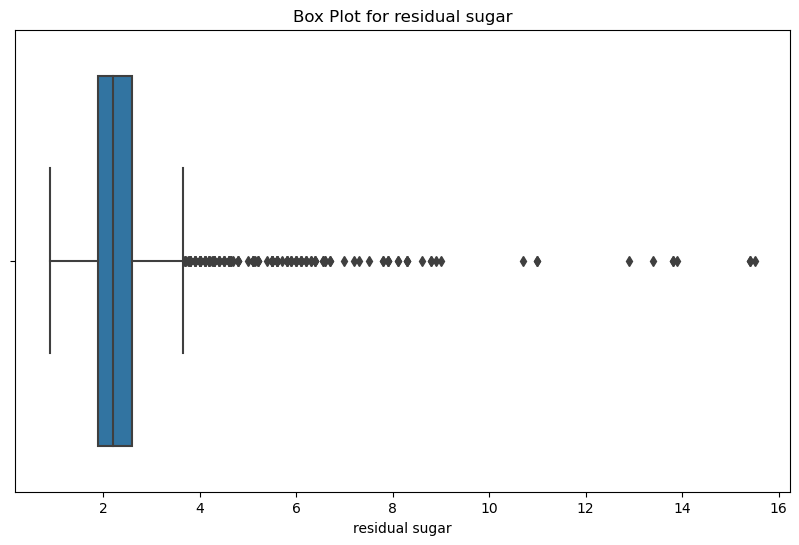

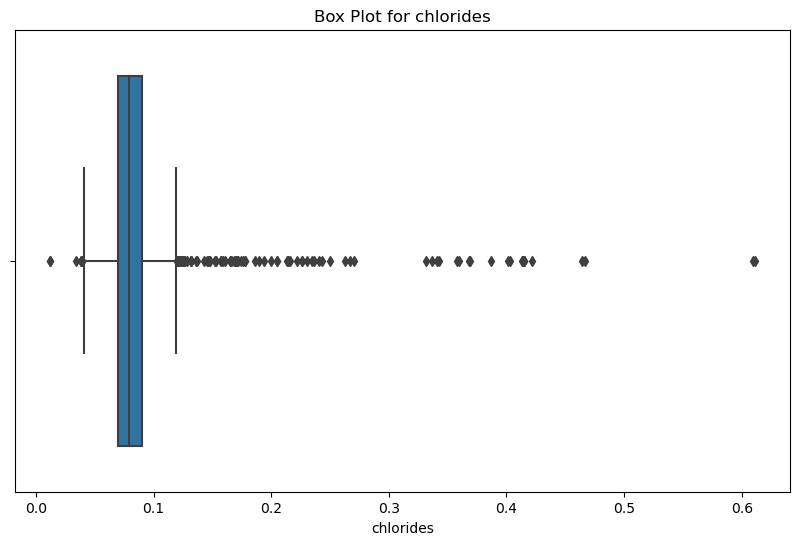

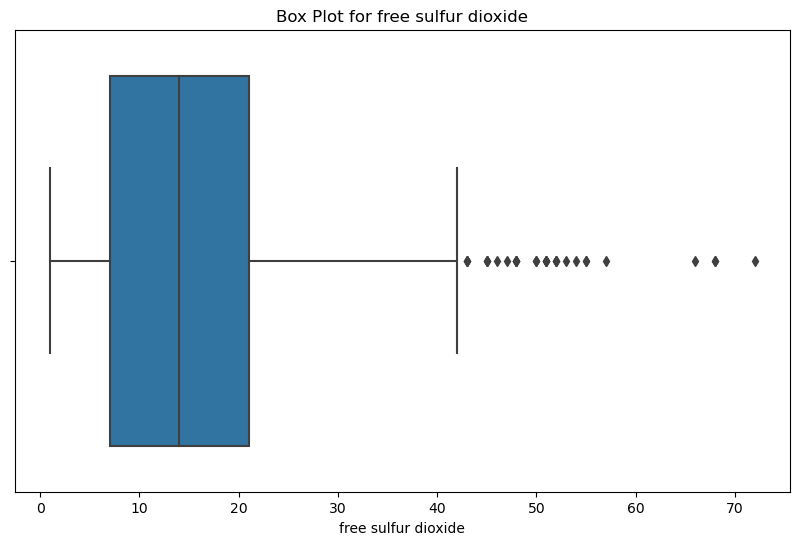

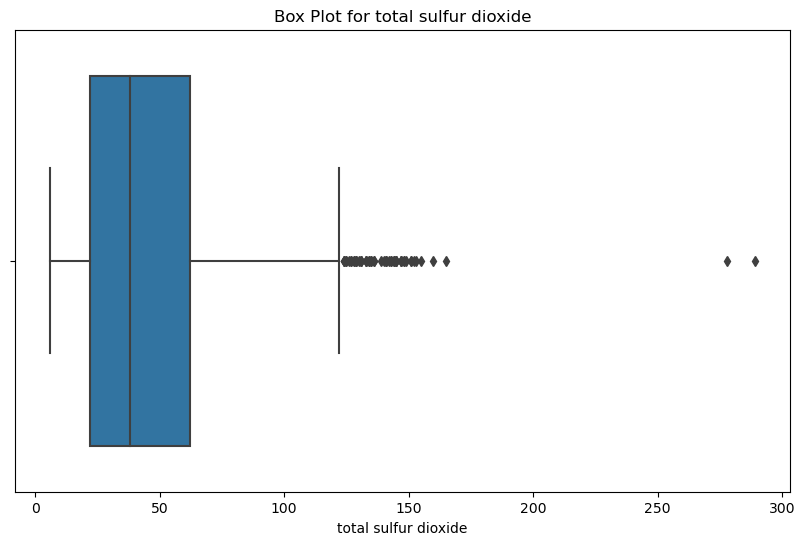

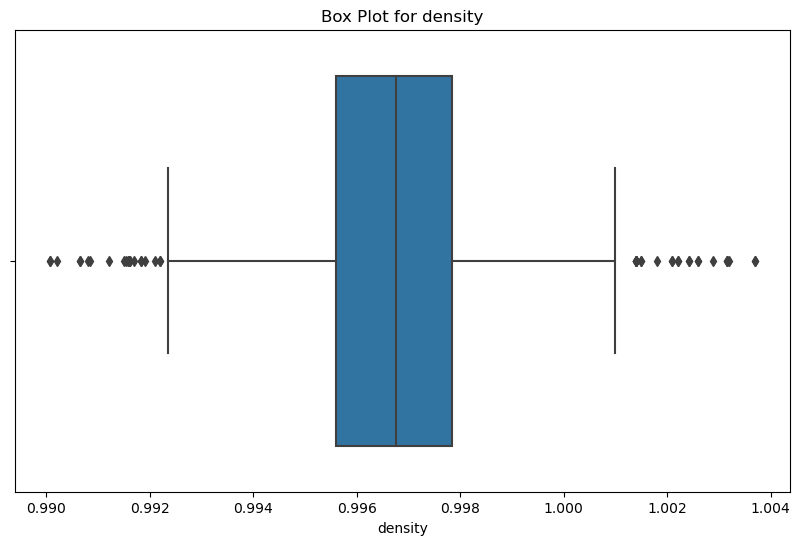

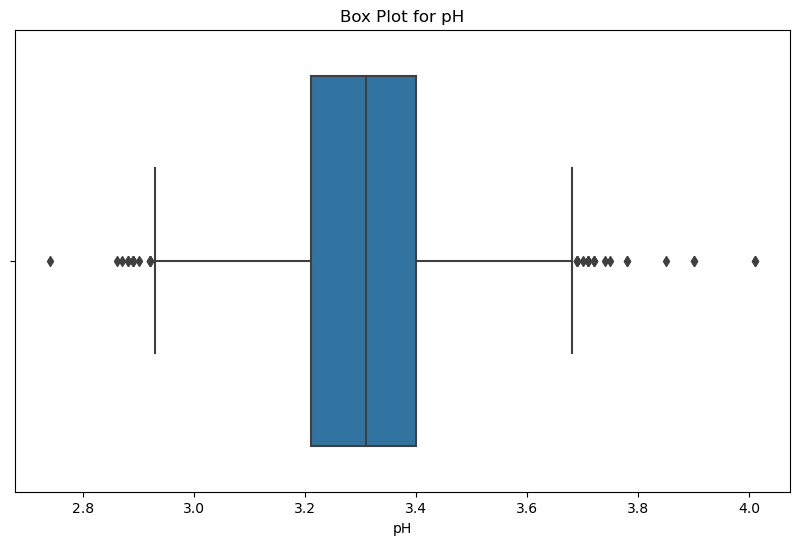

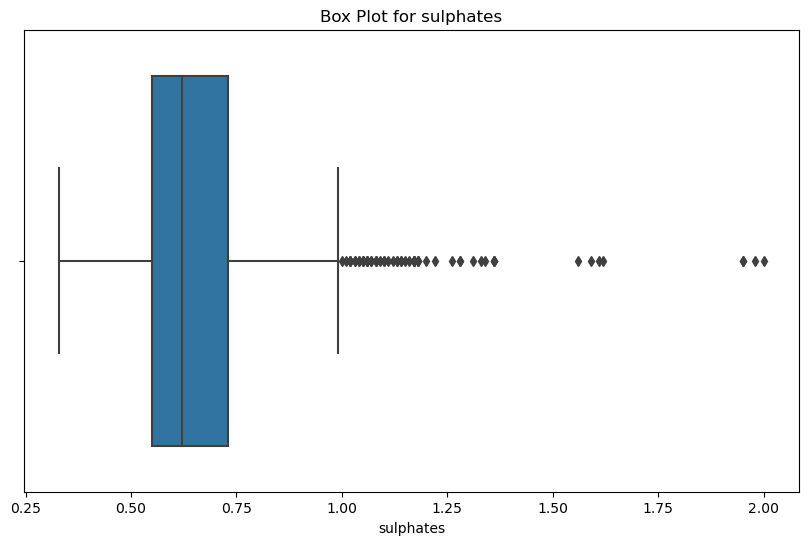

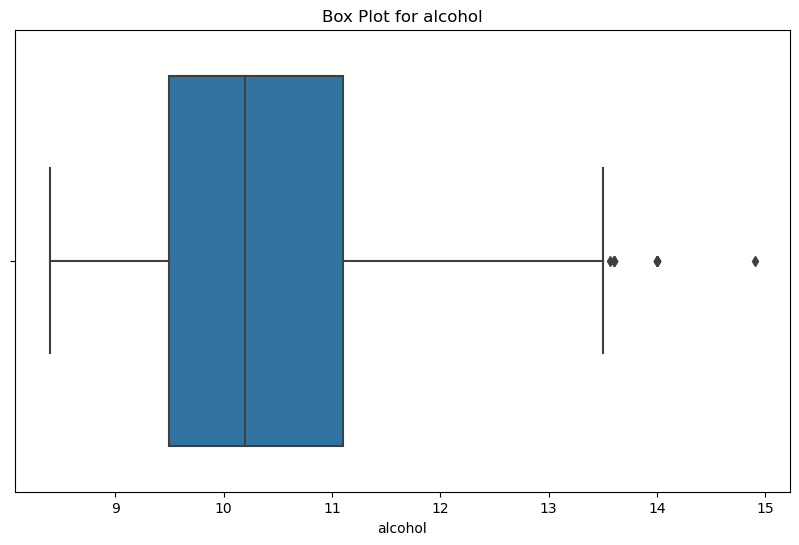

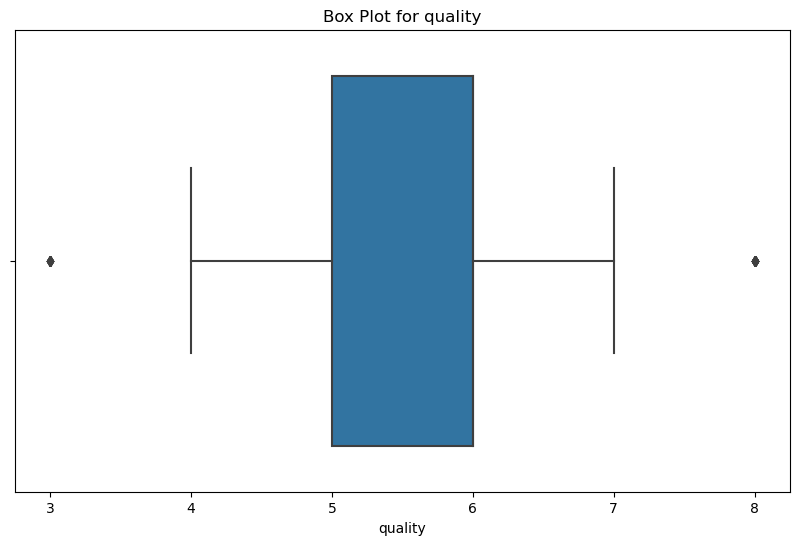

In [37]:
# Plot box plot for each feature individually
for feature in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()


## Removing skewness :

<Axes: >

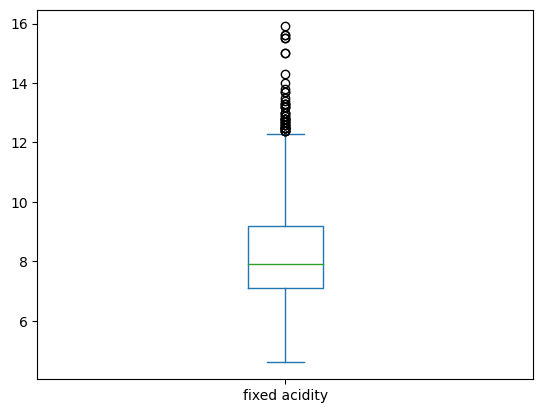

In [38]:
df['fixed acidity'].plot.box()

<Axes: ylabel='Frequency'>

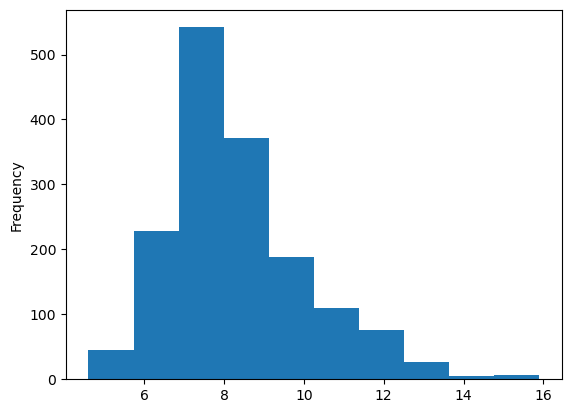

In [39]:
df['fixed acidity'].plot.hist()

In [40]:
# Finding the 25th and 75th percentile for fixed acidity:
percentile25 = df['fixed acidity'].quantile(0.25)
percentile75 = df['fixed acidity'].quantile(0.75)

In [41]:
print(percentile25)
print(percentile75)

7.1
9.2


In [42]:
# Finding the IQR:
iqr = percentile75 - percentile25
iqr

2.0999999999999996

In [43]:
# Finding the upper limit and the lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('Upper Limit', upper_limit)
print('Lower Limit', lower_limit)

Upper Limit 12.349999999999998
Lower Limit 3.95


### Checking and Capping the Outliers issue in Checking the Outliers in chlorides

In [44]:
df[df['fixed acidity'] > upper_limit]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
205            12.8             0.300         0.74             2.6      0.095   
206            12.8             0.300         0.74             2.6      0.095   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
264            12.5             0.560         0.49             2.4      0.064   
294            13.3             0.340         0.52             3.2      0.094   
328            13.4             0.270         0.62             2.6      0.082   
338            12.4             0.490         0.58             3.0      0.103   
339            12.5             0.280         0.54             2.3      0.082   
347            13.8             0.490         0.67             3.0      0.093   
353            13.5             0.530         0.79             4.8      0.120   
359            12.6             0.380         0.66             2.6      0.088   
363            12.5             0.460         0.63             2.0      0.071   
364            12.8             0.615         0.66             5.8      0.083   
366            12.8             0.615         0.66             5.8      0.083   
374            14.0             0.410         0.63             3.8      0.089   
381            13.7             0.415         0.68             2.9      0.085   
391            13.7             0.415         0.68             2.9      0.085   
394            12.7             0.600         0.65             2.3      0.063   
409            12.5             0.460         0.49             4.5      0.070   
429            12.8             0.840         0.63             2.4      0.088   
440            12.6             0.310         0.72             2.2      0.072   
442            15.6             0.685         0.76             3.7      0.100   
446            12.5             0.380         0.60             2.6      0.081   
470            13.0             0.320         0.65             2.6      0.093   
472            12.5             0.370         0.55             2.6      0.083   
509            13.3             0.290         0.75             2.8      0.084   
510            12.4             0.420         0.49             4.6      0.073   
516            12.5             0.600         0.49             4.3      0.100   
538            12.9             0.350         0.49             5.8      0.066   
544            14.3             0.310         0.74             1.8      0.075   
548            12.4             0.350         0.49             2.6      0.079   
554            15.5             0.645         0.49             4.2      0.095   
555            15.5             0.645         0.49             4.2      0.095   
557            15.6             0.645         0.49             4.2      0.095   
559            13.0             0.470         0.49             4.3      0.085   
560            12.7             0.600         0.49             2.8      0.075   
564            13.0             0.470         0.49             4.3      0.085   
565            12.7             0.600         0.49             2.8      0.075   
596            12.4             0.400         0.51             2.0      0.059   
599            12.7             0.590         0.45             2.3      0.082   
601            13.2             0.460         0.52             2.2      0.071   
603            13.2             0.460         0.52             2.2      0.071   
611            13.2             0.380         0.55             2.7      0.081   
652            15.9             0.360         0.65             7.5      0.096   
680            13.3             0.430         0.58             1.9      0.070   
811            12.9             0.500         0.55             2.8      0.072   
814            12.6             0.410         0.54             2.8      0.103   
1224           12.6             0.390

In [45]:
df[df['fixed acidity'] < lower_limit]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

### Capping 

In [46]:
new_df = df.copy()

new_df['fixed acidity'] = np.where(
    new_df['fixed acidity'] > upper_limit,
    upper_limit,
    np.where(
        new_df['fixed acidity'] < lower_limit,
        lower_limit,
        new_df['fixed acidity']
    )
)

In [47]:
new_df.shape

(1599, 12)

<Axes: >

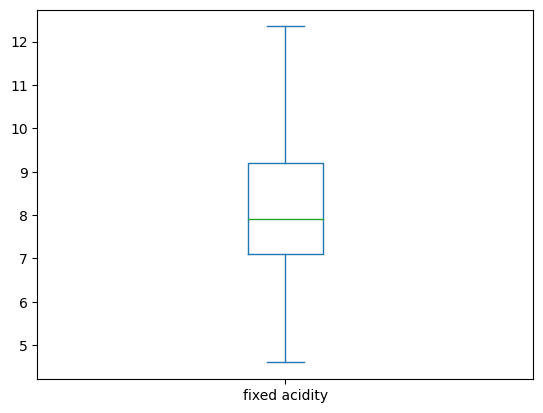

In [48]:
new_df['fixed acidity'].plot.box()

In [49]:
new_df['fixed acidity'].describe()

count    1599.000000
mean        8.290901
std         1.655860
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        12.350000
Name: fixed acidity, dtype: float64

### Below are the Correlations of all the columns with respect to quality (target col)

In [50]:
correlations = df[['fixed acidity', 'quality']].corr()
print(correlations)

corr1 = df[['volatile acidity', 'quality']].corr()
print(corr1)

corr2 = df[['citric acid', 'quality']].corr()
print(corr2)

corr3 = df[['residual sugar', 'quality']].corr()
print(corr3)

corr4 = df[['chlorides','quality']].corr()
print(corr4)

corr5 = df[['free sulfur dioxide','quality']].corr()
print(corr5)

corr6 = df[['total sulfur dioxide', 'quality']].corr()
print(corr6)

corr7 = df[['density','quality']].corr()
print(corr7)

corr8 = df[['pH','quality']].corr()
print(corr8)

corr9 = df[['sulphates','quality']].corr()
print(corr9)

corr10 = df[['alcohol','quality']].corr()
print(corr10)

               fixed acidity   quality
fixed acidity       1.000000  0.124052
quality             0.124052  1.000000
                  volatile acidity   quality
volatile acidity          1.000000 -0.390558
quality                  -0.390558  1.000000
             citric acid   quality
citric acid     1.000000  0.226373
quality         0.226373  1.000000
                residual sugar   quality
residual sugar        1.000000  0.013732
quality               0.013732  1.000000
           chlorides   quality
chlorides   1.000000 -0.128907
quality    -0.128907  1.000000
                     free sulfur dioxide   quality
free sulfur dioxide             1.000000 -0.050656
quality                        -0.050656  1.000000
                      total sulfur dioxide  quality
total sulfur dioxide                1.0000  -0.1851
quality                            -0.1851   1.0000
          density   quality
density  1.000000 -0.174919
quality -0.174919  1.000000
               pH   quality
pH    

C:\Users\andyt\AppData\Local\Temp\ipykernel_19460\3261430356.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'volatile acidity', y = 'quality', data = df, palette = 'cool')


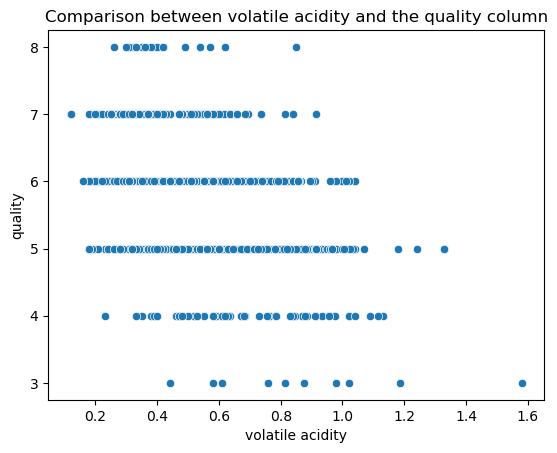

In [60]:
# Comparison between volatile acidity and the quality column

plt.title('Comparison between volatile acidity and the quality column')
sns.scatterplot(x = 'volatile acidity', y = 'quality', data = df, palette = 'cool')
plt.show()

In [61]:
# finding the 25th and 75th percentile of volatile acidity
volatile_percentile25 = df['volatile acidity'].quantile(0.25)
volatile_percentile75 = df['volatile acidity'].quantile(0.75)
print(volatile_percentile25)
print(volatile_percentile75)

0.39
0.64


In [62]:
# Finding IQR of volatile acidity
volatileIQR = volatile_percentile75 - volatile_percentile25
print(volatileIQR)

0.25


In [63]:
# finding the upper limit and the lower limit of the volatile acidity
volatile_upper_limit = volatile_percentile75 + 1.5 * volatileIQR
volatile_lower_limit = volatile_percentile25 - 1.5 * volatileIQR
print(volatile_upper_limit)
print(volatile_lower_limit)

1.0150000000000001
0.015000000000000013


#### finding the outliers of volatile :

In [64]:
df[df['volatile acidity'] > volatile_upper_limit]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
38              5.7             1.130         0.09            1.50      0.172   
94              5.0             1.020         0.04            1.40      0.045   
120             7.3             1.070         0.09            1.70      0.178   
126             8.2             1.330         0.00            1.70      0.081   
127             8.1             1.330         0.00            1.80      0.082   
134             7.9             1.040         0.05            2.20      0.084   
199             6.9             1.090         0.06            2.10      0.061   
553             5.0             1.040         0.24            1.60      0.050   
672             9.8             1.240         0.34            2.00      0.079   
690             7.4             1.185         0.00            4.25      0.097   
700            10.6             1.020         0.43            2.90      0.076   
705             8.4             1.035         0.15            6.00      0.073   
710            10.6             1.025         0.43            2.80      0.080   
724             7.5             1.115         0.10            3.10      0.086   
899             8.3             1.020         0.02            3.40      0.084   
1261            6.3             1.020         0.00            2.00      0.083   
1299            7.6             1.580         0.00            2.10      0.137   
1312            8.0             1.180         0.21            1.90      0.083   
1467            6.7             1.040         0.08            2.30      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
38                    7.0                  19.0  0.99400  3.50       0.48   
94                   41.0                  85.0  0.99380  3.75       0.48   
120                  10.0                  89.0  0.99620  3.30       0.57   
126                   3.0                  12.0  0.99640  3.53       0.49   
127                   3.0                  12.0  0.99640  3.54       0.48   
134                  13.0                  29.0  0.99590  3.22       0.55   
199                  12.0                  31.0  0.99480  3.51       0.43   
553                  32.0                  96.0  0.99340  3.74       0.62   
672                  32.0                 151.0  0.99800  3.15       0.53   
690                   5.0                  14.0  0.99660  3.63       0.54   
700                  26.0                  88.0  0.99840  3.08       0.57   
705                  11.0                  54.0  0.99900  3.37       0.49   
710                  21.0                  84.0  0.99850  3.06       0.57   
724                   5.0                  12.0  0.99580  3.54       0.60   
899                   6.0                  11.0  0.99892  3.48       0.49   
1261                 17.0                  24.0  0.99437  3.59       0.55   
1299                  5.0                   9.0  0.99476  3.50       0.40   
1312                 14.0                  41.0  0.99532  3.34       0.47   
1467                 19.0                  32.0  0.99648  3.52       0.57   

      alcohol  quality  
38        9.8        4  
94       10.5        4  
120       9.0        5  
126      10.9        5  
127      10.9        5  
134       9.9        6  
199      11.4        4  
553      11.5        5  
672       9.5        5  
690      10.7        3  
700      10.1        6  
705       9.9        5  
710      10.1        5  
724      11.2        4  
899      11.0        3  
1261     11.2        4  
1299     10.9        3  
1312     10.5        5  
1467     11.0        4

In [65]:
df[df['volatile acidity'] < volatile_lower_limit]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [66]:
# Capping the volatile acidity column
new_df['volatile acidity'] = np.where(
    new_df['volatile acidity'] > volatile_upper_limit,
    volatile_upper_limit,
    np.where(
        new_df['volatile acidity'] < volatile_lower_limit,
        volatile_lower_limit,
        new_df['volatile acidity']
    )
)

<Axes: >

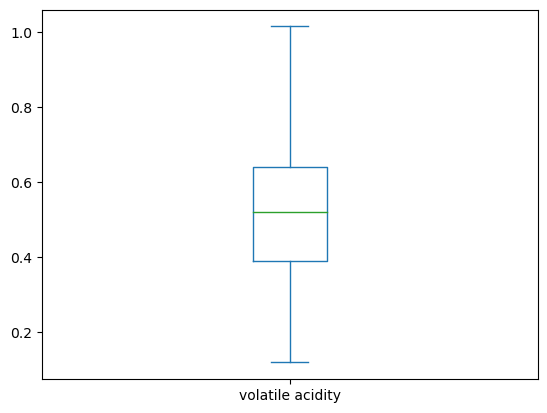

In [67]:
new_df['volatile acidity'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in citric acid

<Axes: >

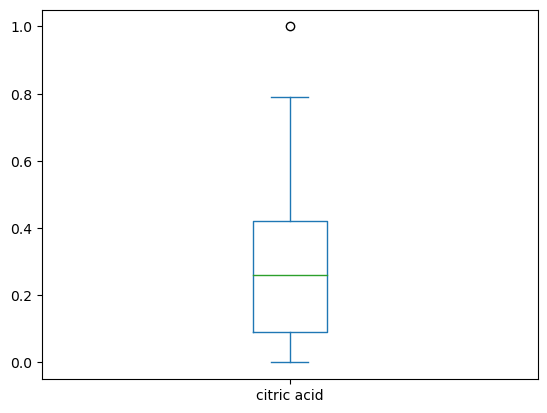

In [68]:
df['citric acid'].plot.box()

In [69]:
# Finding the 25th and 75th percentile of citric acid column
citric_percentile25 = df['citric acid'].quantile(.25)
citric_percentile75 = df['citric acid'].quantile(.75)
print(citric_percentile25)
print(citric_percentile75)

0.09
0.42


In [70]:
# Finding the IQR of the citric acid 
citric_iqr = citric_percentile75 - citric_percentile25
citric_iqr

0.32999999999999996

In [71]:
# finding the upper limit and the lower limit
citric_upper_limit = citric_percentile75 + 1.5 * citric_iqr
citric_lower_limit = citric_percentile25 - 1.5 * citric_iqr
print(citric_upper_limit)
print(citric_lower_limit)

0.9149999999999999
-0.4049999999999999


In [72]:
df[df['citric acid'] > citric_upper_limit]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
151            9.2              0.52          1.0             3.4       0.61   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
151                 32.0                  69.0   0.9996  2.74        2.0   

     alcohol  quality  
151      9.4        4

In [73]:
df[df['citric acid'] < citric_lower_limit]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

### Capping 

In [74]:
# Capping the citric acid column
new_df['citric acid'] = np.where(
    new_df['citric acid'] > citric_upper_limit,
    citric_upper_limit,
    np.where(
        new_df['citric acid'] < citric_lower_limit,
        citric_lower_limit,
        new_df['citric acid']
    )
)

<Axes: >

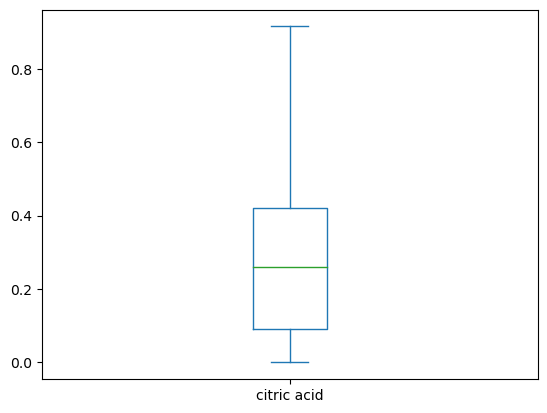

In [75]:
new_df['citric acid'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in chlorides

<Axes: >

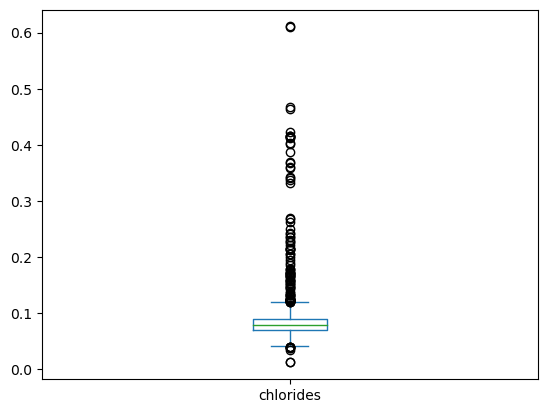

In [76]:
df['chlorides'].plot.box()

In [77]:
# finding the 25th and 75th percentile 
chlorides_percentile25 = df['chlorides'].quantile(.25)
chlorides_percentile75 = df['chlorides'].quantile(.75)
print(chlorides_percentile25)
print(chlorides_percentile75)

0.07
0.09


In [78]:
# finding the IQR 
chlorides_iqr = chlorides_percentile75 - chlorides_percentile25
chlorides_iqr

0.01999999999999999

In [79]:
# finding the upper and lower limit
chlorides_upper_limit = chlorides_percentile75 + 1.5 * chlorides_iqr
chlorides_lower_limit = chlorides_percentile25 - 1.5 * chlorides_iqr
print(chlorides_upper_limit)
print(chlorides_lower_limit)

0.11999999999999998
0.04000000000000002


### Capping 

In [80]:
# Capping the chlorides column
new_df['chlorides'] = np.where(
    new_df['chlorides'] > chlorides_upper_limit,
    chlorides_upper_limit,
    np.where(
        new_df['chlorides'] < chlorides_lower_limit,
        chlorides_lower_limit,
        new_df['chlorides']
    )
)

<Axes: >

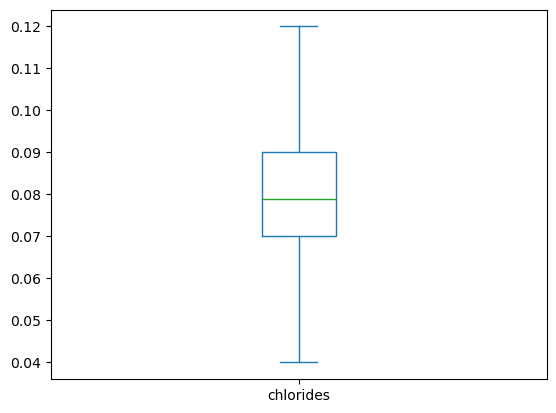

In [81]:
new_df['chlorides'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in free sulfur dioxide

<Axes: >

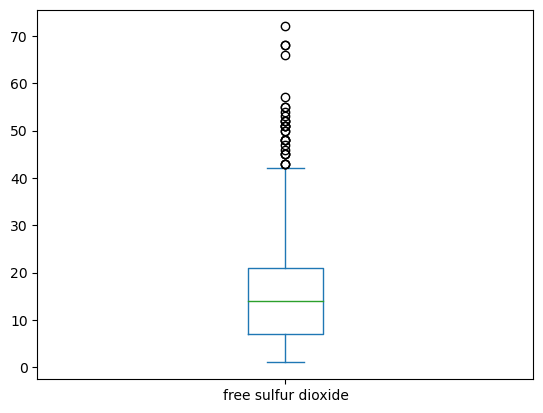

In [82]:
df['free sulfur dioxide'].plot.box()

In [83]:
# finding the 25th and 75th percentile 
free_percentile25 = df['free sulfur dioxide'].quantile(.25)
free_percentile75 = df['free sulfur dioxide'].quantile(.75)
print(free_percentile25)
print(free_percentile75)

7.0
21.0


In [84]:
# finding the IQR
free_iqr = free_percentile75 - free_percentile25
free_iqr

14.0

In [85]:
# finding the upper and the lower limit
free_upper_limit = free_percentile75 + 1.5 * free_iqr
free_lower_limit = free_percentile25 - 1.5 * free_iqr
print(free_upper_limit)
print(free_lower_limit)

42.0
-14.0


### Capping

In [86]:
# Capping the free sulfur dioxide column 
new_df['free sulfur dioxide'] = np.where(
    new_df['free sulfur dioxide'] > free_upper_limit,
    free_upper_limit,
    np.where(
        new_df['free sulfur dioxide'] < free_lower_limit,
        free_lower_limit,
        new_df['free sulfur dioxide']
    )
)

<Axes: >

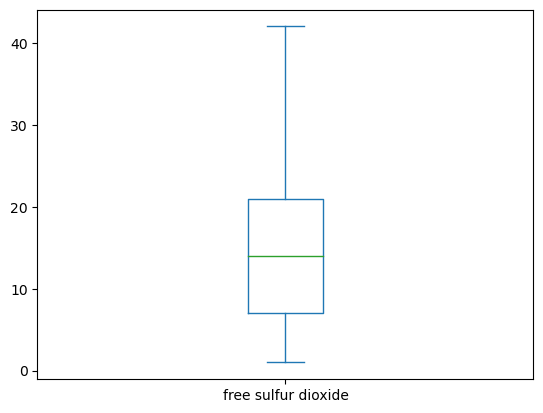

In [87]:
new_df['free sulfur dioxide'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in total sulfur dioxide column

<Axes: >

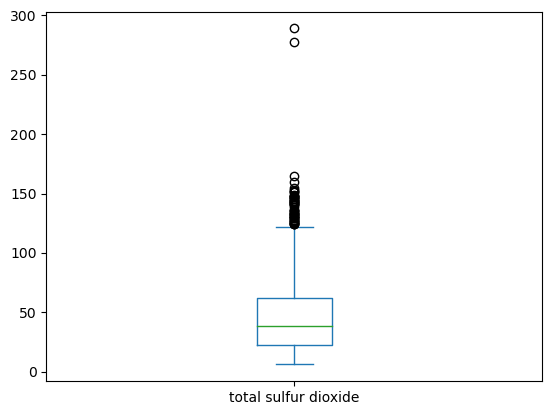

In [88]:
df['total sulfur dioxide'].plot.box()

In [89]:
# finding the 25th and 75th percentile of total sulfur dioxide
total_percentile25 = df['total sulfur dioxide'].quantile(.25)
total_percentile75 = df['total sulfur dioxide'].quantile(.75)
print(total_percentile25)
print(total_percentile75)

22.0
62.0


In [90]:
# finding the IQR of total sulfur dioxide col
total_iqr = total_percentile75 - total_percentile25
total_iqr

40.0

In [91]:
# finding the upper and the lower limit of total sulfur dioxide col
total_upper_limit = total_percentile75 + 1.5 * total_iqr
total_lower_limit = total_percentile25 - 1.5 * total_iqr
print(total_upper_limit)
print(total_lower_limit)

122.0
-38.0


### Capping

In [92]:
new_df['total sulfur dioxide'] = np.where(
    new_df['total sulfur dioxide'] > total_upper_limit, 
    total_upper_limit,
    np.where(
        new_df['total sulfur dioxide'] < total_lower_limit,
        total_lower_limit,
        new_df['total sulfur dioxide']
    )
)

<Axes: >

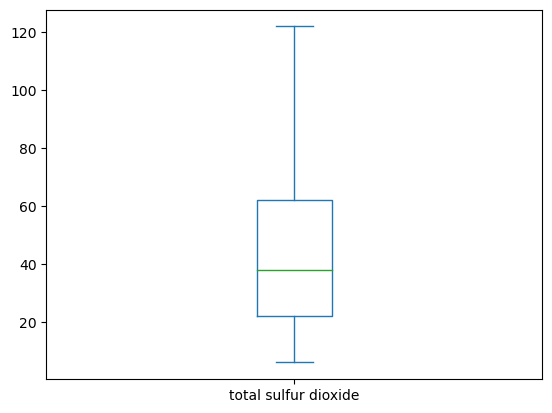

In [93]:
# checking the outliers after capping the col
new_df['total sulfur dioxide'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in density column

<Axes: >

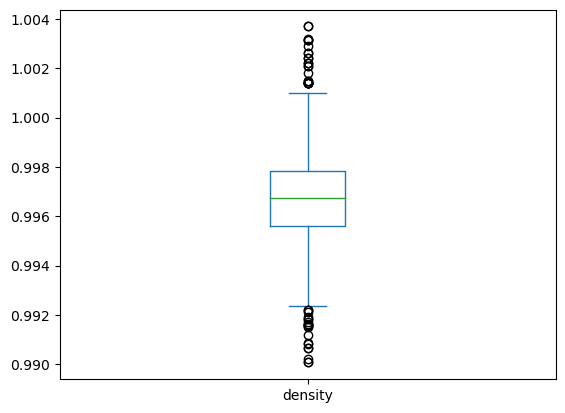

In [94]:
df['density'].plot.box()

In [95]:
# finding the 25th and 75th percentile of density col
density_percentile25 = df['density'].quantile(.25)
density_percentile75 = df['density'].quantile(.75)
print(density_percentile25)
print(density_percentile75)

0.9956
0.997835


In [96]:
# finding the IQR of density col
density_iqr = density_percentile75 - density_percentile25
density_iqr

0.002234999999999987

In [97]:
# finding the upper and lower limit
density_upper_limit = density_percentile75 + 1.5 * density_iqr
density_lower_limit = density_percentile25 - 1.5 * density_iqr
print(density_upper_limit)
print(density_lower_limit)

1.0011875
0.9922475000000001


### Capping 

In [98]:
new_df['density'] = np.where(
    new_df['density'] > density_upper_limit,
    density_upper_limit,
    np.where(
        new_df['density'] < density_lower_limit,
        density_lower_limit,
        new_df['density']
    )
)

<Axes: >

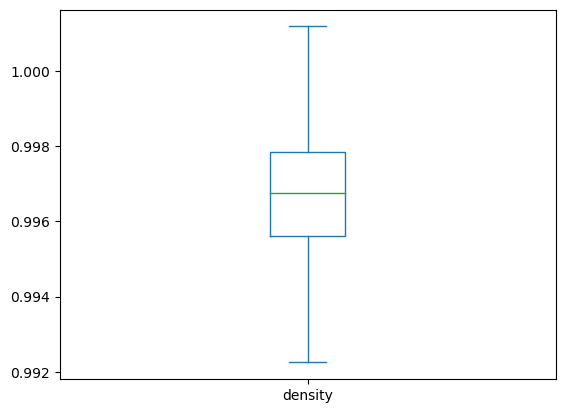

In [99]:
# Checking the outliers after capping
new_df['density'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in pH

<Axes: >

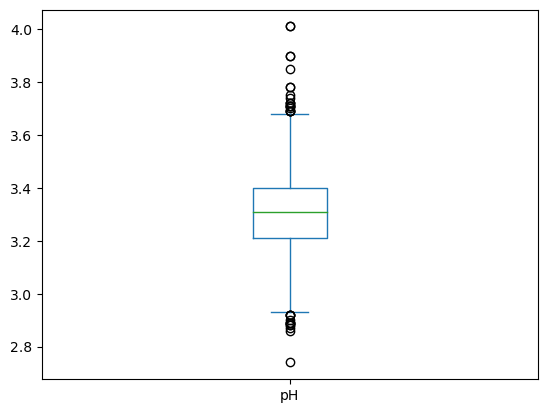

In [100]:
df['pH'].plot.box()

In [101]:
# finding the 25th and 75th percentile of pH col
ph_percentile25 = df['pH'].quantile(.25)
ph_percentile75 = df['pH'].quantile(.75)
print(ph_percentile25)
print(ph_percentile75)

3.21
3.4


In [102]:
# finding IQR of pH col
ph_iqr = ph_percentile75 - ph_percentile25
ph_iqr

0.18999999999999995

In [103]:
# finding the upper and lower limit of pH col
ph_upper_limit = ph_percentile75 + 1.5 * ph_iqr
ph_lower_limit = ph_percentile25 - 1.5 * ph_iqr
print(ph_upper_limit)
print(ph_lower_limit)

3.6849999999999996
2.925


### Capping 

In [104]:
new_df['pH'] = np.where(
    new_df['pH'] > ph_upper_limit, 
    ph_upper_limit,
    np.where(
        new_df['pH'] < ph_lower_limit,
        ph_lower_limit,
        new_df['pH']
    )
)

<Axes: >

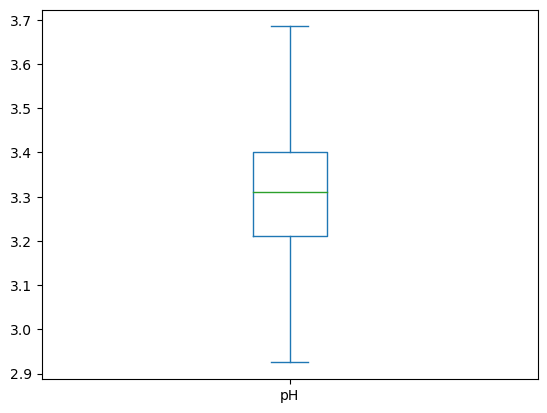

In [105]:
# Rechecking the outliers after capping the pH col
new_df['pH'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in sulphates 

<Axes: >

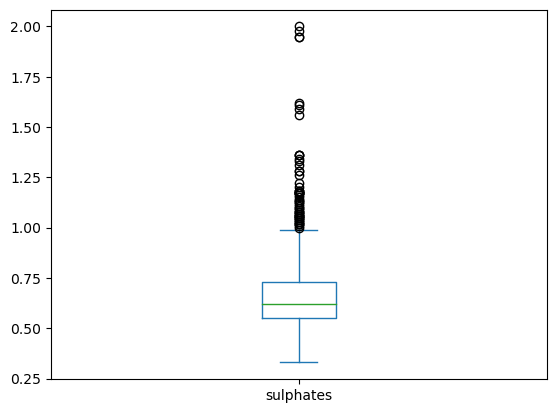

In [106]:
df['sulphates'].plot.box()

In [107]:
# findng the 25th and 75th percentile of sulphates col
sulphates_percentile25 = df['sulphates'].quantile(.25)
sulphates_percentile75 = df['sulphates'].quantile(.75)
print(sulphates_percentile25)
print(sulphates_percentile75)

0.55
0.73


In [108]:
# finding the IQR of sulphates col
sulphates_iqr = sulphates_percentile75 - sulphates_percentile25
sulphates_iqr

0.17999999999999994

In [109]:
# finding the upper and lower limit of sulphates col
sulphates_upper_limit = sulphates_percentile75 + 1.5 * sulphates_iqr
sulphates_lower_limit = sulphates_percentile25 - 1.5 * sulphates_iqr
print(sulphates_upper_limit)
print(sulphates_lower_limit)

0.9999999999999999
0.28000000000000014


### Capping

In [110]:
new_df['sulphates'] = np.where(
    new_df['sulphates'] > sulphates_upper_limit,
    sulphates_upper_limit,
    np.where(
        new_df['sulphates'] < sulphates_lower_limit,
        sulphates_lower_limit,
        new_df['sulphates']
    )
)

<Axes: >

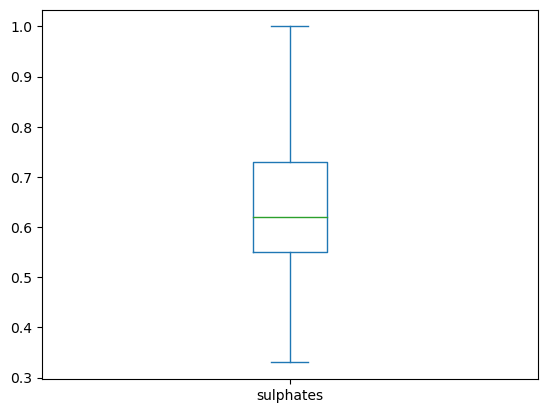

In [111]:
# Rechecking the outliers after the Capping sulphates col
new_df['sulphates'].plot.box()

### Checking and Capping the Outliers issue in Checking the Outliers in alcohol

<Axes: >

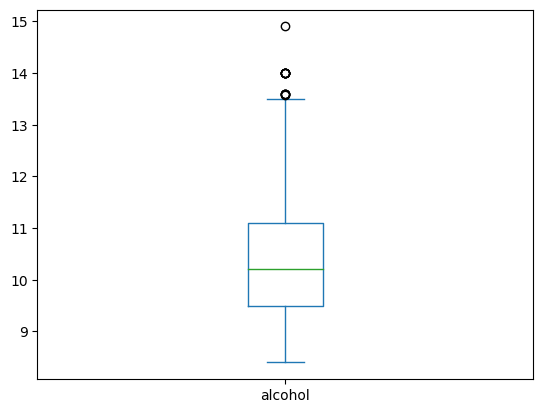

In [112]:
df['alcohol'].plot.box()

In [113]:
# finding the 25th and 75th percentile of alcohol col
alcohol_percentile25 = df['alcohol'].quantile(.25)
alcohol_percentile75 = df['alcohol'].quantile(.75)
print(alcohol_percentile25)
print(alcohol_percentile75)

9.5
11.1


In [114]:
# finding the IQR of alcohol col
alcohol_iqr = alcohol_percentile75 - alcohol_percentile25
alcohol_iqr

1.5999999999999996

In [115]:
# finding the upper and lower limit of alcohol col
alcohol_upper_limit = alcohol_percentile75 + 1.5 * alcohol_iqr
alcohol_lower_limit = alcohol_percentile25 - 1.5 * alcohol_iqr
print(alcohol_upper_limit)
print(alcohol_lower_limit)

13.5
7.1000000000000005


### Capping

In [116]:
new_df['alcohol'] = np.where(
    new_df['alcohol'] > alcohol_upper_limit,
    alcohol_upper_limit,
    np.where(
          new_df['alcohol'] < alcohol_lower_limit,
        alcohol_lower_limit,
        new_df['alcohol']
    )
)

<Axes: >

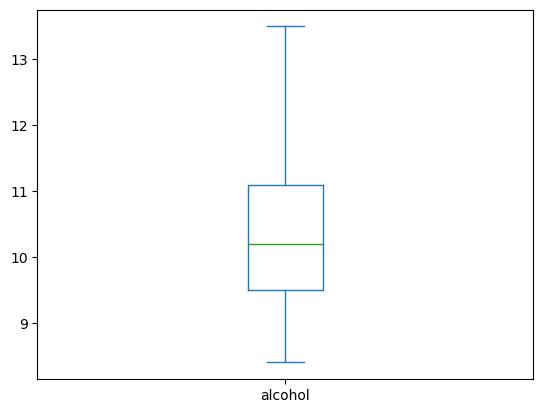

In [117]:
# Rechecking the outliers after capping the alcohol col
new_df['alcohol'].plot.box()

In [118]:
new_df.skew()

fixed acidity           0.700363
volatile acidity        0.420928
citric acid             0.309850
residual sugar          4.540655
chlorides               0.431683
free sulfur dioxide     0.858967
total sulfur dioxide    0.972642
density                 0.025021
pH                      0.054017
sulphates               0.782787
alcohol                 0.795429
quality                 0.217802
dtype: float64

In [119]:
# Updating the new_df DataFrames data into the older df DataFrame
df = new_df

### Removing the residual col since it has only 1% of positive relationship with the target (quality) and also it has lot of skewness and outliers 

In [120]:
# here we can see the correlation between them
corr3 = df[['residual sugar', 'quality']].corr()
corr3

residual sugar   quality
residual sugar        1.000000  0.013732
quality               0.013732  1.000000

In [121]:
# Dropping the col residual sugar
df.drop('residual sugar', axis = 1, inplace = True)
df

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 11 columns]

## Model building

In [122]:
# Seting the cutoff which was given in the problem statement
cutoff = 7

In [123]:
# Creating a new target variable which will be in binary format as we need
df['quality_binary'] = (df['quality'] >= cutoff).astype(int)        # here we have changed this into astype(int) because of the boolean values


In [124]:
# Splitting the data into training and testing data
x = df.drop(['quality','quality_binary'], axis = 1)
y = df['quality_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 50)

In [125]:
x_train.shape  # training input data

(1279, 10)

In [126]:
x_test.shape    # testing input data

(320, 10)

In [127]:
y_train.shape     # training target data

(1279,)

In [128]:
y_test.shape      # testing target data

(320,)

#### Trying the Naive Bayes MultinomialNB

In [129]:
# Calling the Multinomial class
mnb = MultinomialNB()
mnb

MultinomialNB()

In [130]:
# Training the model using the fit method with x_train and y_train
mnb.fit(x_train, y_train)

MultinomialNB()

In [131]:
# Prediction variable
predmnb = mnb.predict(x_test)

In [132]:
predmnb

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [133]:
# Printing the accuracy score
print(accuracy_score(y_test, predmnb))

0.678125


In [134]:
# Checking the Confusion matrix
print(confusion_matrix(y_test, predmnb))

[[196  91]
 [ 12  21]]


In [135]:
# Checking the classification report
print(classification_report(y_test, predmnb))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       287
           1       0.19      0.64      0.29        33

    accuracy                           0.68       320
   macro avg       0.56      0.66      0.54       320
weighted avg       0.86      0.68      0.74       320



In [136]:
# Creating a function for testing the Naive Bayes MultinomialNB model
def pred_mnb(a):
    a = a.reshape(1, -1)
    b = mnb.predict(a)
    print(b)
    if b == 0:
        print('Not Good quality wine')
    elif b == 1:
        print('Good quality wine')

In [137]:
# testing by taking a sample from our dataset
a = np.array([7.3,0.65,0.00,0.065,15.0,21.0,0.99460,3.39,0.47,10.00])
pred_mnb(a)

[1]
Good quality wine


C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [138]:
# # we have used this row for verification

# fixed acidity	volatile acidity	citric acid	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality	quality_binary
# 7	7.3	0.65	0.00	0.065	15.0	21.0	0.99460	3.39	0.47	10.00	7	1

#### Trying Naive Bayes GaussianNB

In [139]:
# Calling the GaussianNB class
gnb = GaussianNB()
gnb

GaussianNB()

In [140]:
# training the model by using fit method with x_train and y_train 
gnb.fit(x_train, y_train)

GaussianNB()

In [141]:
# Creating the prediction variable
predgnb = gnb.predict(x_test)
predgnb

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
# Checking the accuracy score of the model
print(accuracy_score(y_test, predgnb))

0.896875


In [143]:
# checking the confusion matrix
print(confusion_matrix(y_test, predgnb))

[[266  21]
 [ 12  21]]


In [144]:
# Checking the classification report of GaussianNB model
print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       287
           1       0.50      0.64      0.56        33

    accuracy                           0.90       320
   macro avg       0.73      0.78      0.75       320
weighted avg       0.91      0.90      0.90       320



In [145]:
# we have used this row for verification

# fixed acidity	volatile acidity	citric acid	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality	quality_binary
# 0	7.4	0.70	0.00	0.076	11.0	34.0	0.9978	3.51	0.56	9.4	5	0

In [146]:
# creating a function for veirifying the models prediction
def pred_gnb(c):
    c = c.reshape(1, -1)
    d = gnb.predict(c)
    print(d)
    if d == 0:
        print('Not good quality wine')
    elif d == 1:
        print('Good quality wine')

In [147]:
# testing by taking a sample from our dataset
c = np.array([7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4])
pred_gnb(c)

[0]
Not good quality wine


C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#### Trying Decision Tree Classifier

In [148]:
# Calling the Decision Tree classifier
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [149]:
# training the model using fit method with x_train and y_train
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [150]:
# prediction variable
preddtc = dtc.predict(x_test)
preddtc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [151]:
# checking the accuracy score
print(accuracy_score(y_test, preddtc))

0.921875


In [152]:
# checking the confusion matrix
print(confusion_matrix(y_test, preddtc))

[[272  15]
 [ 10  23]]


In [153]:
# checking the classification report
print(classification_report(y_test, preddtc))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       287
           1       0.61      0.70      0.65        33

    accuracy                           0.92       320
   macro avg       0.78      0.82      0.80       320
weighted avg       0.93      0.92      0.92       320



In [154]:
# we have used this row for verification

# fixed acidity	volatile acidity	citric acid	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality	quality_binary
# 7	7.3	0.65	0.00	0.065	15.0	21.0	0.99460	3.39	0.47	10.00	7	1

In [155]:
# Creating a function for testing the Decision Tree model 

def pred_dtc(s):
    s = s.reshape(1, -1)
    p = dtc.predict(s)
    print(s)
    if p == 0:
        print('Not good quality wine')
    elif p == 1:
        print('Good quality wine')

In [156]:
# testing by taking a sample from our dataset
s = np.array([7.3,0.65,0.00,0.065,15.0,21.0,0.99460,3.39,0.47,10.00])
pred_dtc(s)

[[ 7.3     0.65    0.      0.065  15.     21.      0.9946  3.39    0.47
  10.    ]]
Good quality wine


C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### Trying K Nearest Neighbor 

In [157]:
# calling the K Nearest Neighbor classifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [158]:
# training the model using the fit method with x_train and y_train
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [159]:
# prediction variable
predknn = knn.predict(x_test)
predknn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [160]:
# checking the accuracy score
print(accuracy_score(y_test, predknn))

0.903125


In [161]:
# checking the confusion matrix
print(confusion_matrix(y_test, predknn))

[[278   9]
 [ 22  11]]


In [162]:
# checking the classification report
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       287
           1       0.55      0.33      0.42        33

    accuracy                           0.90       320
   macro avg       0.74      0.65      0.68       320
weighted avg       0.89      0.90      0.89       320



In [163]:
# we have used this row for verification

# fixed acidity	volatile acidity	citric acid	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality	quality_binary
# 7	7.3	0.65	0.00	0.065	15.0	21.0	0.99460	3.39	0.47	10.00	7	1

In [164]:
# Creatin the function for testing the KNN model
def pred_knn(e):
    e = e.reshape(1, -1)
    f = knn.predict(e)
    print(e)
    if f == 0:
        print('Not good quality wine')
    elif f == 1:
        print('Good quality wine')

In [165]:
# testing by taking a sample from our dataset
e = np.array([7.3,0.65,0.00,0.065,15.0,21.0,0.99460,3.39,0.47,10.00])
pred_dtc(e)

[[ 7.3     0.65    0.      0.065  15.     21.      0.9946  3.39    0.47
  10.    ]]
Good quality wine


C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### Trying the Support Vector Machine (SVM)

In [166]:
# Calling the SVM classifier
svc = SVC()
svc

SVC()

In [167]:
# training the model using the fit method with x_train and y_train
svc.fit(x_train, y_train)

SVC()

In [168]:
# prediction variable
predsvc = svc.predict(x_test)
predsvc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
# Checking the accuracy score
print(accuracy_score(y_test, predsvc))

0.896875


In [170]:
# checking the confusion matrix
print(confusion_matrix(y_test, predsvc))

[[287   0]
 [ 33   0]]


In [171]:
# checking the classification report
print(classification_report(y_test, predsvc))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       287
           1       0.00      0.00      0.00        33

    accuracy                           0.90       320
   macro avg       0.45      0.50      0.47       320
weighted avg       0.80      0.90      0.85       320



C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
# we have used this row for verification

# fixed acidity	volatile acidity	citric acid	chlorides	free sulfur dioxide	total sulfur dioxide	density	pH	sulphates	alcohol	quality	quality_binary
# 7	7.3	0.65	0.00	0.065	15.0	21.0	0.99460	3.39	0.47	10.00	7	1

In [173]:
# Creating function for testing the SVM model
def pred_svc(g):
    g = g.reshape(1, -1)
    h = svc.predict(g)
    print(g)
    if h == 0:
        print('Not good quality wine')
    elif h == 1:
        print('Good quality wine')

In [174]:
# Testing the model by taking an input data from our dataset
g = np.array([7.3,0.65,0.00,0.065,15.0,21.0,0.99460,3.39,0.47,10.00])
pred_dtc(g)

[[ 7.3     0.65    0.      0.065  15.     21.      0.9946  3.39    0.47
  10.    ]]
Good quality wine


C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Below are the Correlations of all the columns with respect to quality (target col)

In [175]:
correlations = df[['fixed acidity', 'quality']].corr()
print(correlations)

               fixed acidity   quality
fixed acidity       1.000000  0.125442
quality             0.125442  1.000000


In [176]:
corr1 = df[['volatile acidity', 'quality']].corr()
print(corr1)

                  volatile acidity   quality
volatile acidity          1.000000 -0.387608
quality                  -0.387608  1.000000


In [177]:
corr2 = df[['citric acid', 'quality']].corr()
print(corr2)

             citric acid   quality
citric acid     1.000000  0.227144
quality         0.227144  1.000000


In [179]:
corr4 = df[['chlorides','quality']].corr()
print(corr4)

           chlorides   quality
chlorides   1.000000 -0.183037
quality    -0.183037  1.000000


In [180]:
corr5 = df[['free sulfur dioxide','quality']].corr()
print(corr5)

                     free sulfur dioxide   quality
free sulfur dioxide             1.000000 -0.050641
quality                        -0.050641  1.000000


In [181]:
corr6 = df[['total sulfur dioxide', 'quality']].corr()
print(corr6)

                      total sulfur dioxide   quality
total sulfur dioxide              1.000000 -0.201542
quality                          -0.201542  1.000000


In [182]:
corr7 = df[['density','quality']].corr()
print(corr7)

         density  quality
density  1.00000 -0.17633
quality -0.17633  1.00000


In [183]:
corr8 = df[['pH','quality']].corr()
print(corr8)

               pH   quality
pH       1.000000 -0.061507
quality -0.061507  1.000000


In [184]:
corr9 = df[['sulphates','quality']].corr()
print(corr9)

           sulphates  quality
sulphates    1.00000  0.32871
quality      0.32871  1.00000


In [185]:
corr10 = df[['alcohol','quality']].corr()
print(corr10)

          alcohol   quality
alcohol  1.000000  0.478556
quality  0.478556  1.000000


#### These are the insights which columns and physiochemical properties make a wine Good !